In [29]:
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn.objects as so

from sklearn import linear_model    # Herramientas de modelos lineales
from sklearn.metrics import mean_squared_error, r2_score    # Medidas de desempeño
from sklearn.preprocessing import PolynomialFeatures    # Herramientas de polinomios

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

from formulaic import Formula

In [69]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna() #me saca todos los valores nulos, como? los elimina

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
train_ind = np.full(len(penguins), False)
train_ind[0:int(0.8*len(penguins))] = True
np.random.shuffle(train_ind)
penguins_train = penguins[train_ind == True]
penguins_test = penguins[train_ind == False] # este codigo es la manera manual de lo de abajo

In [5]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.2, random_state=42)

In [70]:
X = pd.DataFrame(penguins["flipper_length_mm"])
y = pd.DataFrame(penguins["body_mass_g"])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)


In [78]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal sin intercept
modelo.fit(X_train, y_train)   # Realiza

# Predicciones
y_pred = modelo.predict(X_test)

# Bondad del ajuste
r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.7938115564401114
Raiz cuadarada del ECM:  360.398001833317


In [72]:
modelo = linear_model.LinearRegression()    # Inicializamos un modelo de Regresion Lineal sin intercept
modelo.fit(X_train**2, y_train)   # Realiza

y_pred = modelo.predict(X_test**2)

r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.798016088079326
Raiz cuadarada del ECM:  356.70451284964815


In [73]:
modelo = linear_model.LinearRegression() 
modelo.fit(X_train**3, y_train) 

y_pred = modelo.predict(X_test**3)

r2 = r2_score(y_test, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y_test, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.8001297307720785
Raiz cuadarada del ECM:  354.8332532334887


In [89]:
y_pred = sorted(modelo.predict(X).flatten())

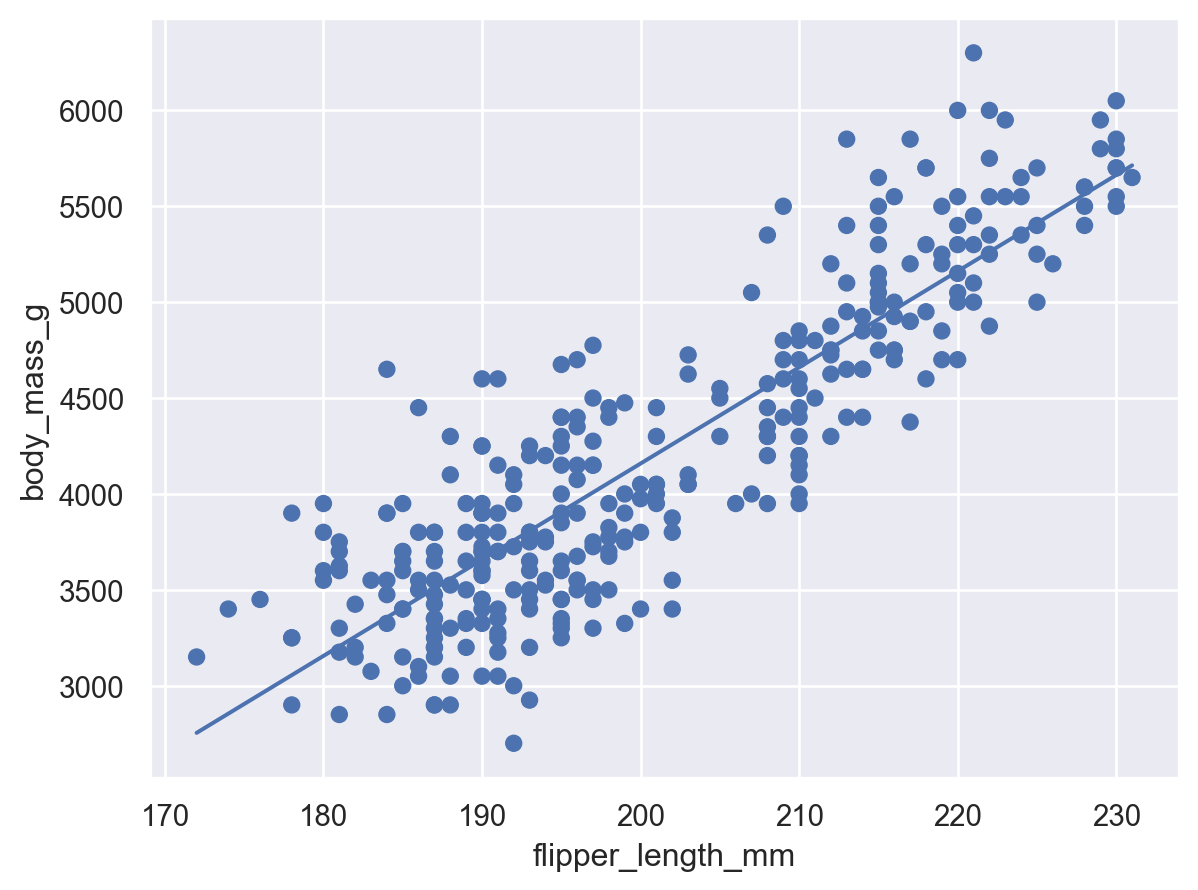

In [96]:
(
    so.Plot(data = penguins, x = "flipper_length_mm", y = "body_mass_g")
    .add(so.Line(), so.PolyFit(1))  # Otro milagro!! No le tenía ninguna fe a esto :)
    .add(so.Dot())
)

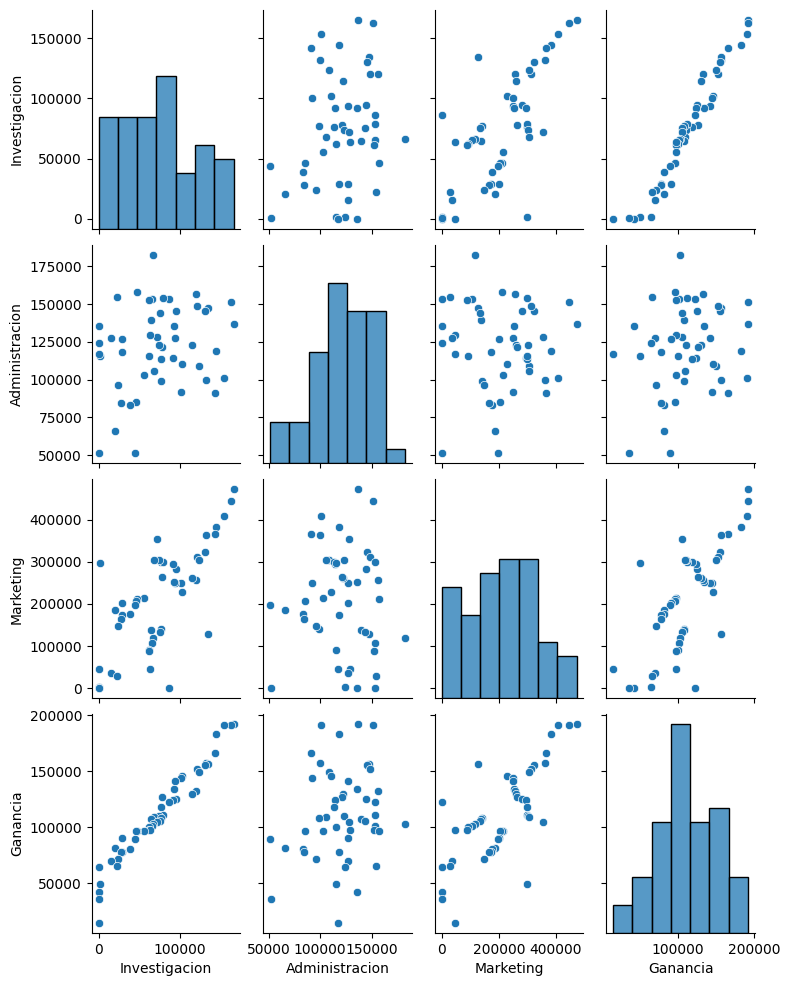

In [96]:
stups = pd.read_csv("50_Startups.csv")
sns.pairplot(data=stups, aspect=0.8)

In [109]:
y, X = Formula("Ganancia ~ Investigacion").get_model_matrix(stups)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.9465353160804392
Raiz cuadarada del ECM:  9226.100548285232


In [105]:
y, X = Formula("Ganancia ~ Administracion").get_model_matrix(stups)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.04028714077757245
Raiz cuadarada del ECM:  39089.07005473707


In [106]:
y, X = Formula("Ganancia ~ Marketing").get_model_matrix(stups)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X)

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

R^2:  0.5591535746115515
Raiz cuadarada del ECM:  26492.82942981263


In [104]:
y, X = Formula("body_mass_g ~ flipper_length_mm + sex").get_model_matrix(penguins)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X).flatten()

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))
display("La diferencia de peso entre macho y hembra es de " + str(round(modelo.coef_.flatten()[2])) + " gramos") 


R^2:  0.8058374128212915
Raiz cuadarada del ECM:  354.2762094481607


'La diferencia de peso entre macho y hembra es de 348 gramos'

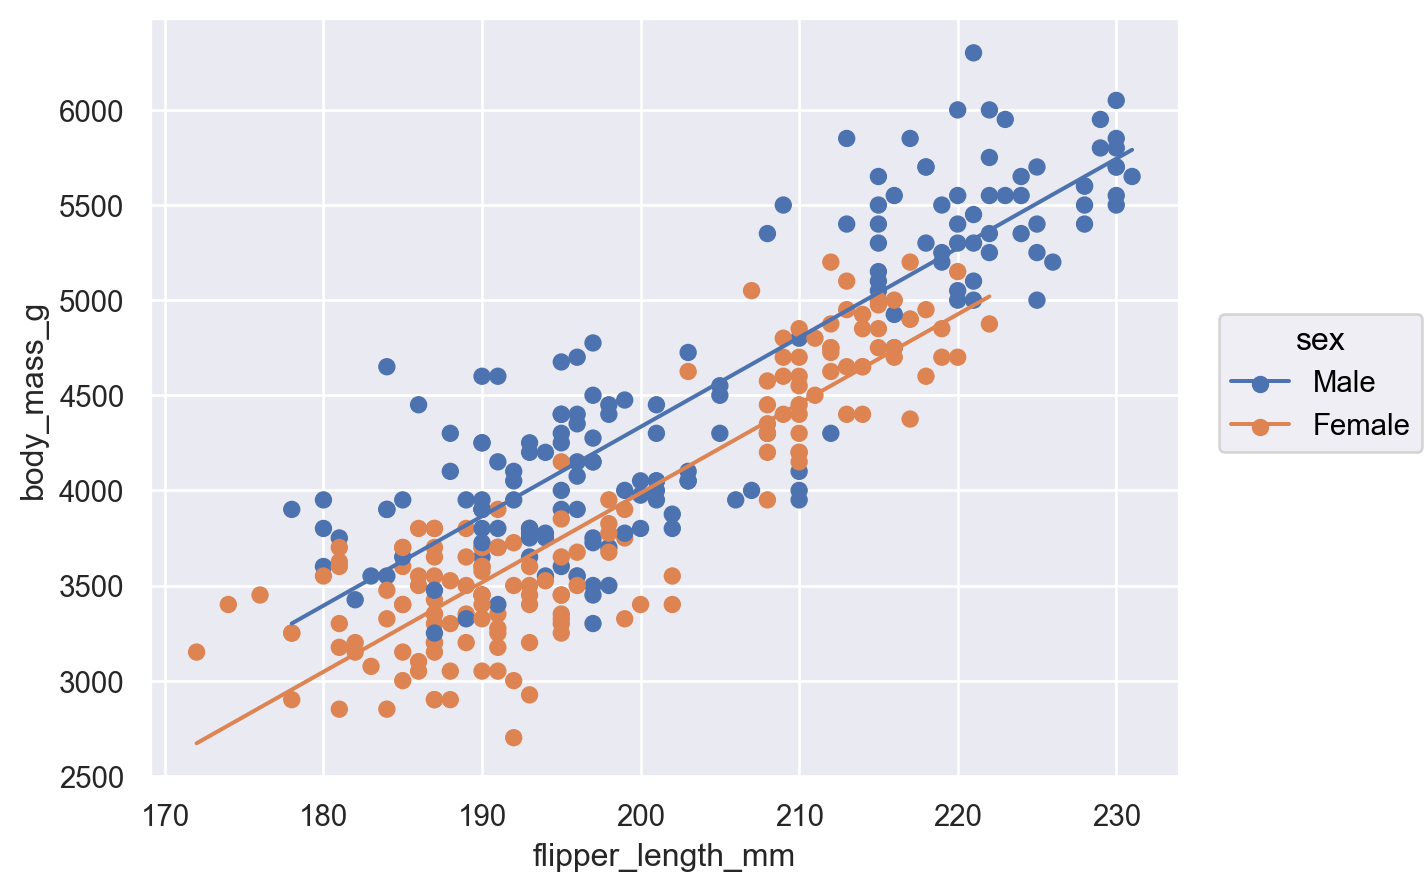

In [105]:
(
    so.Plot(data = penguins, x = "flipper_length_mm", y = "body_mass_g", color = "sex")
    .add(so.Line(), y=y_pred, color = "sex")  # Otro milagro!! No le tenía ninguna fe a esto :)
    .add(so.Dot())
)

In [11]:
encoderOrd = OrdinalEncoder()
sex01 = encoderOrd.fit_transform(penguins[["sex"]])
penguins["sex01"] = sex01 #Con formulaic esto sale automatico usando sex como variable

In [37]:
encoderOHE = OneHotEncoder(sparse_output = False)
species3 = encoderOHE.fit_transform(penguins[["species"]])
species3_df = pd.DataFrame(species3, columns=encoderOHE.get_feature_names_out(), index=penguins.index)
penguins3 = pd.concat([penguins, species3_df], axis = 1)

In [109]:
y, X = Formula("body_mass_g ~ flipper_length_mm + species").get_model_matrix(penguins)
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X, y)
y_pred = modelo.predict(X).flatten()

r2 = r2_score(y, y_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y, y_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))


R^2:  0.7870332829483717
Raiz cuadarada del ECM:  371.03517379275524


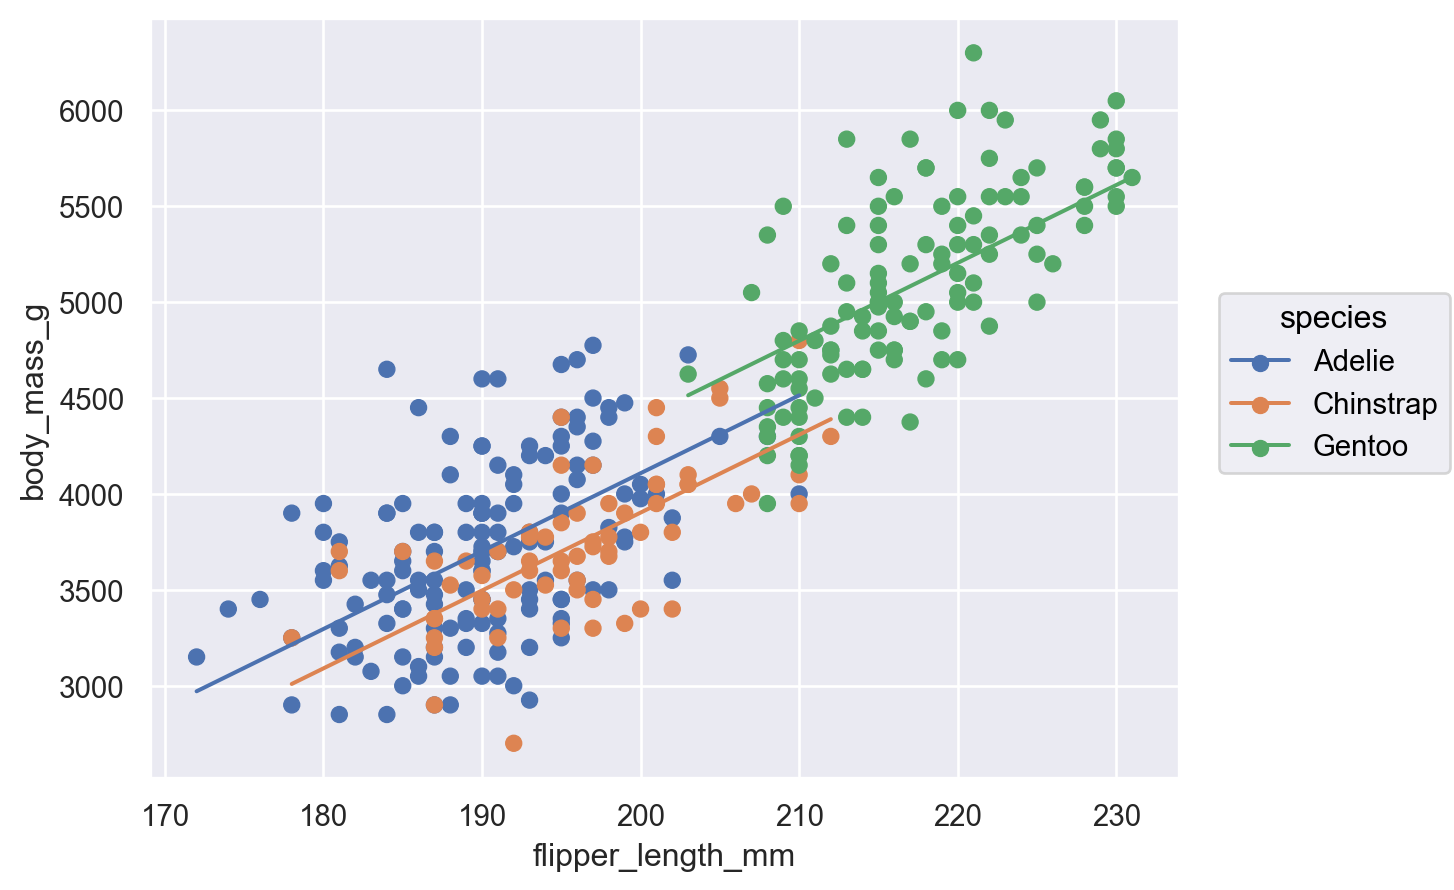

In [110]:
(
    so.Plot(data = penguins, x = "flipper_length_mm", y = "body_mass_g", color = "species")
    .add(so.Line(), y=y_pred, color = "species")  # Otro milagro!! No le tenía ninguna fe a esto :)
    .add(so.Dot())
)

Nivel 1: Entrenemos cada modelo en todos los datos

In [111]:
inm = pd.read_csv("inmuebles.csv")

In [124]:
y1, X1 = Formula("precio ~ superficie").get_model_matrix(inm)
y2, X2 = Formula("precio ~ superficie + zona").get_model_matrix(inm)
y3, X3 = Formula("precio ~ superficie : zona").get_model_matrix(inm)

In [115]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X1,y1)
print(modelo.coef_)

[[-45.73153403   4.73579682]]


In [131]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X2,y2)
print(modelo.coef_)
y2_pred = modelo.predict(X2).flatten()

r2 = r2_score(y2, y2_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y2, y2_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[ -3.43077907   3.53386388  53.90813726 134.50896043]]
R^2:  0.9580813979513345
Raiz cuadarada del ECM:  29.848178898483575


In [132]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X3,y3)
print(modelo.coef_)
y3_pred = modelo.predict(X3).flatten()

r2 = r2_score(y3, y3_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y3, y3_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[55.69922784  2.49226022  3.46562757  4.27934134]]
R^2:  0.9732554953611157
Raiz cuadarada del ECM:  23.841398274942655


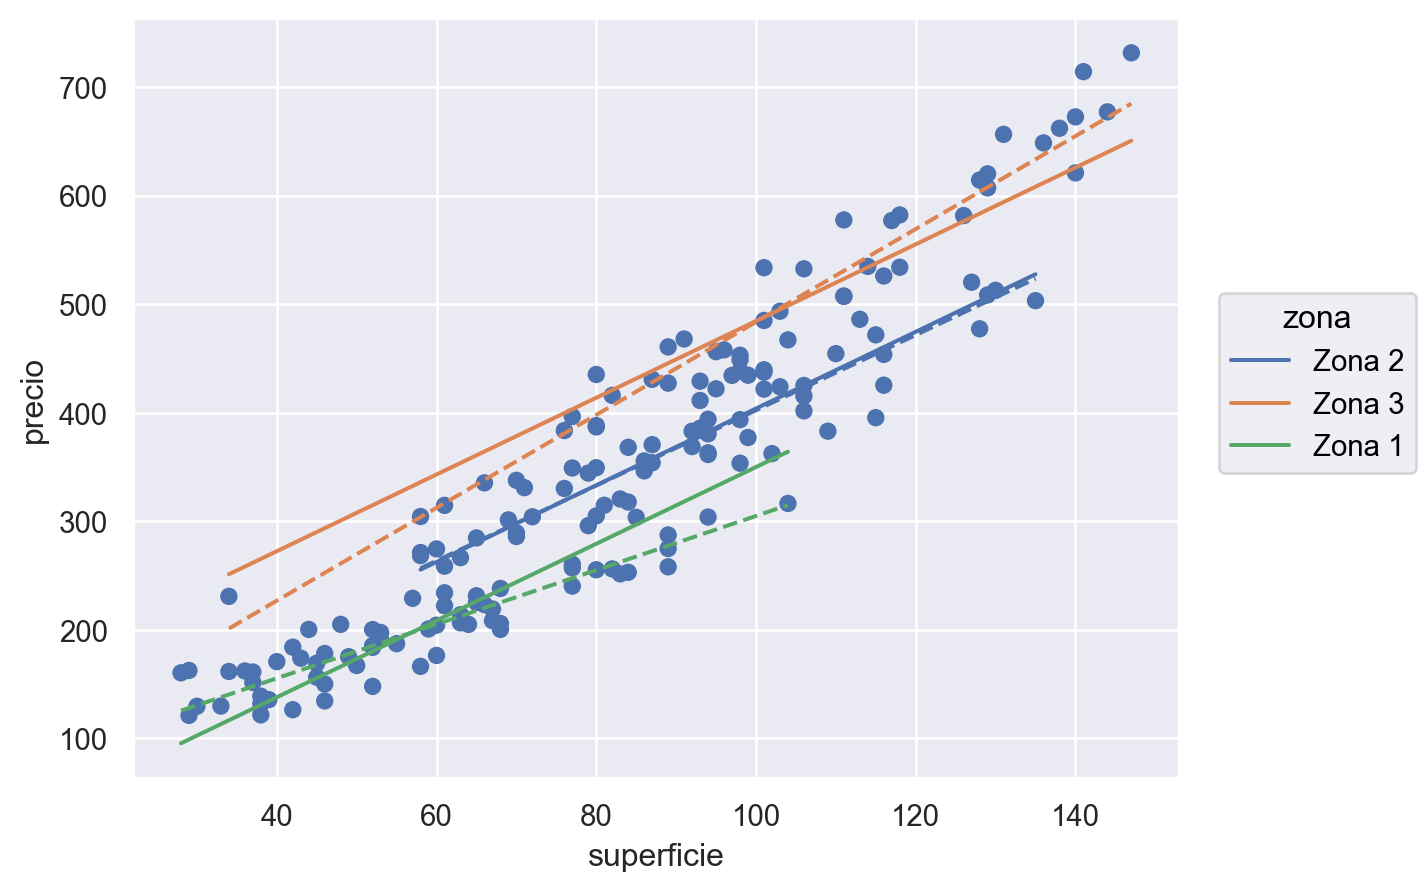

In [135]:
(
    so.Plot(inm, x = "superficie", y = "precio")
    .add(so.Dot())
    .add(so.Line(), y = y2_pred, color = "zona")
    .add(so.Line(linestyle='--'), y = y3_pred, color = "zona")
)

Nivel 2: Separar en entrenamiento y testeo


In [152]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)

In [155]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X1_train,y1_train)
print(modelo.coef_)
y1_pred = modelo.predict(X1_test).flatten()

r2 = r2_score(y1_test, y1_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y1_test, y1_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[-49.33503504   4.70567868]]
R^2:  0.8432462515821457
Raiz cuadarada del ECM:  57.02533063146178


In [156]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X2_train,y2_train)
print(modelo.coef_)
y2_pred = modelo.predict(X2_test).flatten()

r2 = r2_score(y2_test, y2_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y2_test, y2_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[  0.45744506   3.42262062  58.99984427 147.5010829 ]]
R^2:  0.9228218904752272
Raiz cuadarada del ECM:  40.01344211735404


In [157]:
modelo = linear_model.LinearRegression(fit_intercept = False)
modelo.fit(X3_train,y3_train)
print(modelo.coef_)
y3_pred = modelo.predict(X3_test).flatten()

r2 = r2_score(y3_test, y3_pred)
print('R^2: ', r2)
ecm = mean_squared_error(y3_test, y3_pred)
print('Raiz cuadarada del ECM: ', np.sqrt(ecm))

[[60.86860436  2.39212562  3.39415577  4.24269284]]
R^2:  0.9518375405882162
Raiz cuadarada del ECM:  31.609175851252704


Es mejor modelo el numero 3, tanto desde el punto de vista de RECM y R2, como desde el de los coeficientes (si bien son para variables categoricas son coeficientes altos)